## ARCH Model Forecasting

### Exercise 48

Use 50% of the sample to estimate your preferred GARCH model for returns to the S&P 500 and the
EUR/USD rate, and construct forecasts for the remaining period.

In [37]:
from arch import arch_model
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import numpy as np
register_matplotlib_converters()

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

sp500 = pd.read_hdf('./data/arch-data.h5','sp500')
returns = 1000 * sp500.pct_change().dropna()
# TARCH(1,1,1)
mod = arch_model(returns, o=1, power=1.0)
last = returns.index[returns.shape[0] // 2]
res = mod.fit(last_obs=last)
in_samp_variance = res.conditional_volatility ** 2
in_samp_variance.dropna()

forecasts = res.forecast(align="target")
oos_variance = forecasts.variance.dropna()
oos_variance

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4485.018723660958
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4483.412039556735
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4480.0828021447
Iteration:      4,   Func. Count:     35,   Neg. LLF: 4473.414499200324
Iteration:      5,   Func. Count:     42,   Neg. LLF: 4464.584845514126
Iteration:      6,   Func. Count:     51,   Neg. LLF: 4462.456255501963
Iteration:      7,   Func. Count:     60,   Neg. LLF: 4457.657699517857
Iteration:      8,   Func. Count:     67,   Neg. LLF: 4455.751876962514
Iteration:      9,   Func. Count:     75,   Neg. LLF: 4455.480576350281
Iteration:     10,   Func. Count:     82,   Neg. LLF: 4455.450917447273
Iteration:     11,   Func. Count:     89,   Neg. LLF: 4455.4463589222405
Iteration:     12,   Func. Count:     96,   Neg. LLF: 4455.446299293449
Iteration:     13,   Func. Count:    103,   Neg. LLF: 4455.446293521606
Optimization terminated successfully.    (Exit mode 0)
          

,h.1
DATE,
2015-01-07,164.597089
2015-01-08,135.068846
2015-01-09,111.715519
2015-01-12,133.144961
2015-01-13,151.692928
...,...
2019-12-24,20.407734
2019-12-26,20.146129
2019-12-27,18.951022


In [ ]:
fig, ax = plt.subplots(1, 1)
plt.plot(in_samp_variance, label="In Sample")
plt.plot(oos_variance, label="Out of Sample")
ax.set_xlim(in_samp_variance.index[0], oos_variance.index[-1])
ylim = ax.set_ylim(0, ax.get_ylim()[1])
legend = plt.legend(frameon=False)

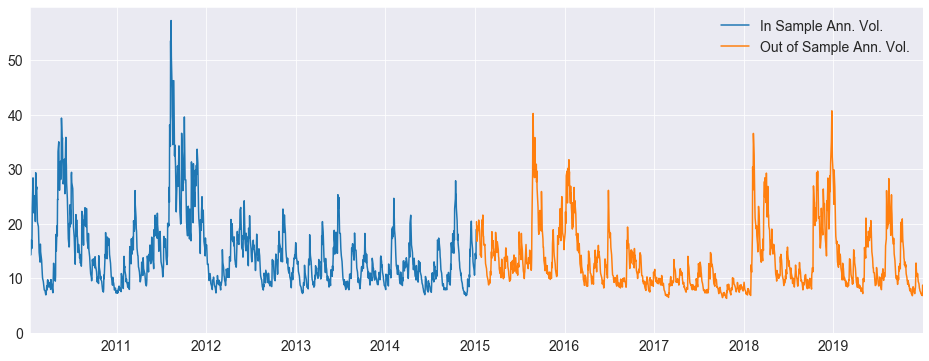

In [36]:
fig, ax = plt.subplots(1, 1)
plt.plot(np.sqrt(252*in_samp_variance / 100), label="In Sample Ann. Vol.")
plt.plot(np.sqrt(252*oos_variance / 100), label="Out of Sample Ann. Vol.")
ax.set_xlim(in_samp_variance.index[0], oos_variance.index[-1])
ylim = ax.set_ylim(0, ax.get_ylim()[1])
legend = plt.legend(frameon=False)

### Exercise 49

Evaluate the accuracy of the forecasts.

### Exercise 50

Evaluate the accuracy of forecasts from a 2-year backward moving average variance.

### Exercise 51

Compare the ARCH-model forecasts to a naive 2-year backward looking moving average using QLIKE.